In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

execfile ("_ImportScript.py")

1


In [2]:
execfile ("_ExploreMocksOneNoiseRezEach.py")

/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:580: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*10000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))
/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/universe.py:414: ComplexWarning: Casting complex values to real discards the imaginary part
  ay_real[zero_ind] = value[zero_ind].astype(np.float)
/Users/LaurencePeanuts/Documents/Travail/Stanford/Music/Music/beatbox/multiverse.py:359: ComplexWarning: Casting complex values to real discards the imaginary part
  R_real[zero_ind,:] = beatbox.Universe.R[zero_ind,:].astype(np.float)


In [ ]:
execfile ("_Alpharobustness.py")

In [ ]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(posterior)
print np.sqrt(sigma.reshape(-1)[max_ind])

In [ ]:
n, bins, patches = plt.hist(alphas, 40, normed=1, facecolor='green', alpha=0.75)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# bug: the Tex interpretor doesn't work properly...
plt.xlabel(r'$\alpha$')
plt.ylabel('Probability')
plt.title(r'Histogram of $\alpha$ values')
x = np.linspace(0.9,1.1, 100)
rv = norm()
plt.plot(x, norm.pdf(x, loc=mu.reshape(-1)[max_ind], scale=np.sqrt(sigma.reshape(-1)[max_ind])), 'k-', lw=2, label='frozen pdf')


#plt.axis([40, 160, 0, 0.03])
plt.grid(True)


plt.savefig('RobustnessAnalysis/alphahist_lmax'+str(beatbox.Universe.truncated_lmax)+'_nmin'+str(beatbox.Universe.truncated_lmin)+'_nmax'+str(beatbox.Universe.truncated_nmax)+'_nmin'+str(beatbox.Universe.truncated_nmin)+'_2.png')


plt.show()

In [ ]:
for i in range(1000):
    rec_fn=beatbox.You.all_reconstructed_universes[i].ay
    np.savetxt( "RobustnessAnalysis/1000realizations_nmax6_lmax8/rec_ay"+str(i)+".txt", rec_fn)

In [ ]:
from scipy.stats import chi2
print 1-chi2.cdf(1.14, 5) 

In [ ]:
print len(beatbox.You.all_reconstructed_universes)
print len(beatbox.You.all_simulated_universes)

In [ ]:
beatbox.You.solve_for_3D_potential(MockUniverse[-1].ay2ayreal_for_inference(MockUniverse[-1].ay))
Delta_fn = beatbox.You.all_simulated_universes[-1].fn.reshape(64, 1)-beatbox.You.all_reconstructed_universes[-1].fn
chi2value = np.dot (Delta_fn.T , np.dot( beatbox.You.inv_A, Delta_fn  ))
p_value = 1-chi2.cdf(chi2value, len(beatbox.You.all_simulated_universes[0].fn)) 
print chi2.cdf(chi2value, len(beatbox.You.all_simulated_universes[0].fn))
print p_value, chi2value

In [ ]:
pvals=np.array([])
chi2vals=np.array([])
for a in range(10000):
    beatbox.You.solve_for_3D_potential(MockUniverse[a].ay2ayreal_for_inference(MockUniverse[a].ay))
    Delta_fn = beatbox.You.all_simulated_universes[a].fn.reshape(64, 1)-beatbox.You.all_reconstructed_universes[a].fn
    chi2value = np.dot (Delta_fn.T , np.dot( beatbox.You.inv_A, Delta_fn  ))
    p_value = 1-chi2.cdf(chi2value, len(beatbox.You.all_simulated_universes[a].fn)) 
    pvals = np.append(pvals, p_value)
    chi2vals = np.append(chi2vals, chi2value)

In [ ]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(pvals,bins=np.logspace(-0.05, 0.0, 100), facecolor='green', alpha=0.75)
plt.gca().set_xscale("log")
#n, bins, patches = plt.hist(pvals,bins=np.linspace(0.9, 1.0, 100), facecolor='green', alpha=0.75)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.xlabel(r'p-values')
plt.ylabel('Probability')
plt.title(r'P-values for 10 000 mocks with $l_{max}=8$, $n_{max}=2$')
plt.xlim(0.95,1)

#x = np.linspace(norm.ppf(0.01, loc=1, scale=0.19), norm.ppf(0.99, loc=1,  scale=0.19), 100)
#x=np.linspace(0,1.6, 100)
#rv = norm()
#plt.plot(x, norm.pdf(x, loc=1.02, scale=0.14), 'k-', lw=2, label='frozen pdf')


#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.savefig('RobustnessAnalysis/pvalshist_lmax8_nmax2.png')

plt.show()

In [5]:
from scipy.stats import chi2


In [12]:
print np.mean(pvals)
print np.mean(sigmas_dev)

0.507567511051
0.790188188141


In [3]:
from scipy.special import erfinv
print erfinv(0.9999892)*np.sqrt(2)
from scipy.special import erf
print erf(4.*1./np.sqrt(2))
print erfinv( 1-np.mean(pvals))*np.sqrt(2)
print erf(np.sqrt(0.004/2))

4.40050347086
0.999936657516
0.662630063334
0.0504290288489


In [6]:

probabilities2=chi2.cdf(chi2vals, len(beatbox.You.all_simulated_universes[-1].fn)) 
sigmas_dev=erfinv(probabilities2)*np.sqrt(2)


In [ ]:
print sigmas_dev[:50]
print (erfinv(pvals)*np.sqrt(2))[:50]
print chi2vals[:50]
#print pvals[:300]

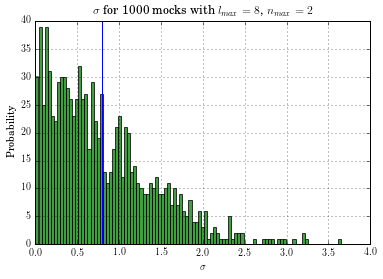

In [11]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(sigmas_dev, 100,facecolor='green', alpha=0.75)
#plt.gca().set_xscale("log")
#n, bins, patches = plt.hist(pvals,bins=np.linspace(0.9, 1.0, 100), facecolor='green', alpha=0.75)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.xlabel(r'$\sigma$')
plt.ylabel('Probability')
plt.title(r'$\sigma$ for 1000 mocks with $l_{max}=8$, $n_{max}=2$')
#plt.xlim(0.95,1)

#x = np.linspace(norm.ppf(0.01, loc=1, scale=0.19), norm.ppf(0.99, loc=1,  scale=0.19), 100)
#x=np.linspace(0,1.6, 100)
#rv = norm()
#plt.plot(x, norm.pdf(x, loc=1.02, scale=0.14), 'k-', lw=2, label='frozen pdf')


#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.axvline(np.mean(sigmas_dev))

plt.show()

In [ ]:

U, s, V_star = np.linalg.svd(beatbox.You.A)
inv_A = np.dot(V_star.T, np.dot(np.diag(1./s),U.T))
print 1./s
print inv_A
print beatbox.You.all_reconstructed_universes[-1].fn
print beatbox.You.all_reconstructed_universes[-1].fn.reshape(len(beatbox.You.all_reconstructed_universes[-1].fn),1)-beatbox.You.all_simulated_universes[-1].fn.reshape(len(beatbox.You.all_reconstructed_universes[-1].fn),1)

In [ ]:
beatbox.You.all_reconstructed_universes[0].rearrange_fn_from_vector_to_grid()
beatbox.You.all_reconstructed_universes[0].evaluate_potential_given_fourier_coefficients()

In [ ]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(beatbox.You.all_simulated_universes[1].phi[:,:,20])

In [ ]:
plt.imshow(beatbox.You.all_reconstructed_universes[1].phi[:,:,20])

In [ ]:
100*0.1

In [ ]:
num=5
postn=np.zeros(1000)
for i in range(1000):
    postn[i] = beatbox.You.all_simulated_universes[-1-i].fn[num] 
    
n, bins, patches = plt.hist(postn, 20, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.axvline(beatbox.You.all_simulated_universes[0].fn[num])

#plt.axvline(We.fn[5])

plt.show()

In [ ]:
print np.std([1.00306455, 1.0029922, 1.00266627, 1.00301888, 1.00307177, 1.00291031, 1.00326173])
print np.mean([1.00306455, 1.0029922, 1.00266627, 1.00301888, 1.00307177, 1.00291031, 1.00326173])

print np.sqrt(((1.00306455-1)**2+(1.0029922-1)**2+ (1.00266627-1)**2+ (1.00301888-1)**2+ (1.00307177-1)**2+ (1.00291031-1)**2+ (1.00326173-1)**2)/7)

focus -9425 seeing 1.4 20:25